### Import Packages

In [1]:
import pandas as pd
import numpy as np
import data_preprocess as dp
import data_visualization as dv
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

### Read Data

In [2]:
# get the mahattan id list
json_path = './data/NYC Taxi Zones.geojson' # the taxi zones geojson path
m_ids = dp.get_mids(json_path) # get the mahattan ids
m_ids

3        4
9       24
12      12
13      13
40      41
      ... 
246    244
248    246
251    249
261    261
262    262
Name: location_id, Length: 66, dtype: object

In [3]:
# get a wohle years data in manhattan
data_path_list = [
  'data/yellow_tripdata_2022-01.parquet',
  'data/yellow_tripdata_2022-02.parquet',
  'data/yellow_tripdata_2022-03.parquet',
  'data/yellow_tripdata_2022-04.parquet',
  'data/yellow_tripdata_2022-05.parquet',
  'data/yellow_tripdata_2022-06.parquet',
  'data/yellow_tripdata_2022-07.parquet',
  'data/yellow_tripdata_2022-08.parquet',
  'data/yellow_tripdata_2022-09.parquet',
  'data/yellow_tripdata_2022-10.parquet',
  'data/yellow_tripdata_2022-11.parquet',
  'data/yellow_tripdata_2022-12.parquet'
]
start_time = '2022/01/01'
end_time = '2023/01/01'
m_tripdata = dp.get_tripdata(data_path_list, m_ids, start_time, end_time)
m_tripdata
  

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,count
0,0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,...,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,1
1,1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,...,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,1
2,2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,...,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,1
3,3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,...,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,1
4,4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,...,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32716045,3399540,2,2022-12-31 23:01:46,2022-12-31 23:26:45,NaN,3.97,NaN,None,107,50,...,23.55,0.0,0.5,5.51,0.0,1.0,33.06,NaN,NaN,1
32716046,3399542,2,2022-12-31 23:06:51,2022-12-31 23:17:08,NaN,0.91,NaN,None,68,48,...,17.65,0.0,0.5,4.33,0.0,1.0,25.98,NaN,NaN,1
32716047,3399543,2,2022-12-31 23:16:37,2022-12-31 23:34:19,NaN,7.50,NaN,None,263,261,...,33.63,0.0,0.5,3.76,0.0,1.0,41.39,NaN,NaN,1
32716048,3399545,2,2022-12-31 23:13:24,2022-12-31 23:29:08,NaN,5.06,NaN,None,75,50,...,26.23,0.0,0.5,0.00,0.0,1.0,30.23,NaN,NaN,1


In [4]:
# get month, week, hour
m_tripdata['month'] = m_tripdata['tpep_pickup_datetime'].dt.month
m_tripdata['day'] = m_tripdata['tpep_pickup_datetime'].dt.dayofweek + 1
m_tripdata['hour'] = m_tripdata['tpep_pickup_datetime'].dt.hour
m_tripdata

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,count,month,day,hour
0,0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,...,3.65,0.0,0.3,21.95,2.5,0.0,1,1,6,0
1,1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,...,4.00,0.0,0.3,13.30,0.0,0.0,1,1,6,0
2,2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,...,1.76,0.0,0.3,10.56,0.0,0.0,1,1,6,0
3,3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,...,0.00,0.0,0.3,11.80,2.5,0.0,1,1,6,0
4,4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,...,3.00,0.0,0.3,30.30,2.5,0.0,1,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32716045,3399540,2,2022-12-31 23:01:46,2022-12-31 23:26:45,NaN,3.97,NaN,None,107,50,...,5.51,0.0,1.0,33.06,NaN,NaN,1,12,6,23
32716046,3399542,2,2022-12-31 23:06:51,2022-12-31 23:17:08,NaN,0.91,NaN,None,68,48,...,4.33,0.0,1.0,25.98,NaN,NaN,1,12,6,23
32716047,3399543,2,2022-12-31 23:16:37,2022-12-31 23:34:19,NaN,7.50,NaN,None,263,261,...,3.76,0.0,1.0,41.39,NaN,NaN,1,12,6,23
32716048,3399545,2,2022-12-31 23:13:24,2022-12-31 23:29:08,NaN,5.06,NaN,None,75,50,...,0.00,0.0,1.0,30.23,NaN,NaN,1,12,6,23


### Week

In [5]:
week_count = m_tripdata.groupby('day').agg({'count':'sum'})
week_count

,count
day,
1,4121285
2,4818526
3,4992266
4,5110585
5,5023252
6,4889611
7,3760525


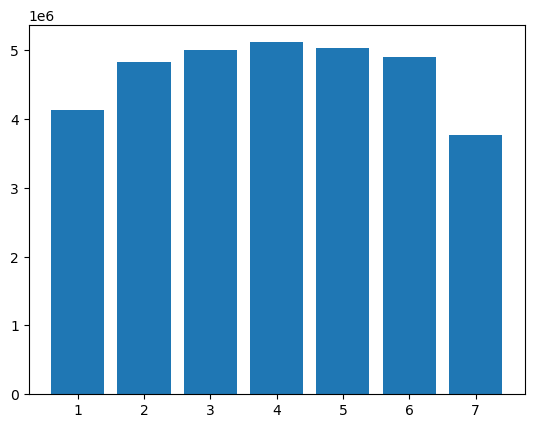

In [6]:
# plot
plt.bar(week_count.index,week_count['count'])
plt.show()

### Month

In [7]:
month_count = m_tripdata.groupby(['month','day']).agg({'count':'sum'})
month_count

count
month day        
1     1    309071
      2    278244
      3    293974
      4    309567
      5    315226
...           ...
12    3    374672
      4    483352
      5    474469
      6    456098
      7    290493

[84 rows x 1 columns]

In [8]:
month_count = month_count.reset_index(drop=False)

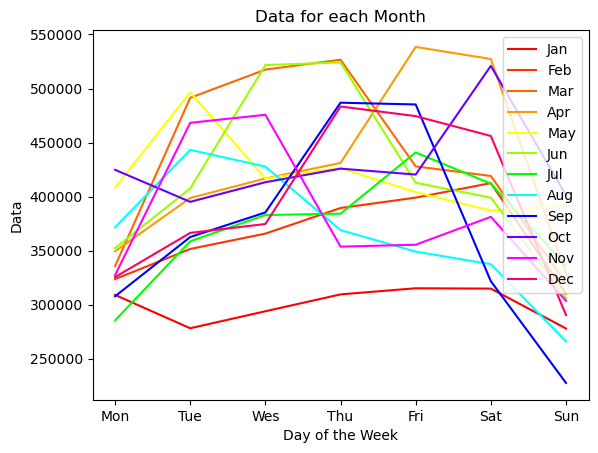

In [9]:
x = ['Mon','Tue','Wes','Thu','Fri','Sat','Sun']
colors = ['#ff0000','#ff3300','#ff6600','#ff9900','#ffff00','#99ff00','#00ff00','#00ffff','#0000ff','#6600ff','#ff00ff','#ff0066']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(len(months)):
  month_data = month_count[i*7:(i+1)*7]
  plt.plot(x, month_data['count'], color=colors[i], label=months[i])
plt.xlabel('Day of the Week')
plt.ylabel('Data')
plt.title('Data for each Month')
plt.legend(loc='best')
plt.show()
  

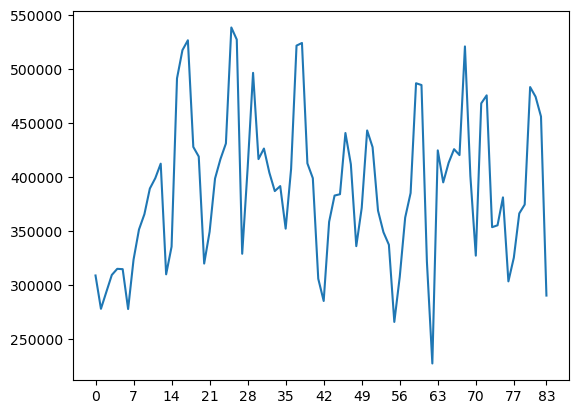

In [10]:
# plot
plt.plot(month_count.index,month_count['count'])
custom_ticks = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 83]
custom_labels = [month_count.index[tick] for tick in custom_ticks]
plt.xticks(custom_ticks, custom_labels)
plt.show()
  

### Peek Hours

In [11]:
Mon = m_tripdata['day'].apply(lambda x:x==1)
Tue = m_tripdata['day'].apply(lambda x:x==2)
Wed = m_tripdata['day'].apply(lambda x:x==3)
Thu = m_tripdata['day'].apply(lambda x:x==4)
Fri = m_tripdata['day'].apply(lambda x:x==5)
Sat = m_tripdata['day'].apply(lambda x:x==6)
Sun = m_tripdata['day'].apply(lambda x:x==7)
mon_tripdata = m_tripdata[Mon]
tue_tripdata = m_tripdata[Tue]
wed_tripdata = m_tripdata[Wed]
thu_tripdata = m_tripdata[Thu]
fri_tripdata = m_tripdata[Fri]
sat_tripdata = m_tripdata[Sat]
sun_tripdata = m_tripdata[Sun]
mon_tripdata

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,count,month,day,hour
91423,117145,2,2022-01-03 00:02:48,2022-01-03 00:04:53,1.0,0.35,1.0,N,116,152,...,0.00,0.0,0.3,4.80,0.0,0.0,1,1,1,0
91818,117836,2,2022-01-03 00:01:18,2022-01-03 00:06:52,5.0,0.83,1.0,N,186,246,...,1.86,0.0,0.3,11.16,2.5,0.0,1,1,1,0
92308,118702,2,2022-01-03 00:10:31,2022-01-03 00:20:18,1.0,3.82,1.0,N,237,42,...,0.00,0.0,0.3,15.80,2.5,0.0,1,1,1,0
92309,118703,1,2022-01-03 00:56:35,2022-01-03 01:02:23,1.0,0.90,1.0,N,48,50,...,2.00,0.0,0.3,10.80,2.5,0.0,1,1,1,0
92310,118704,2,2022-01-03 00:00:47,2022-01-03 00:10:06,1.0,2.21,1.0,N,41,75,...,0.00,0.0,0.3,10.30,0.0,0.0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32708138,3389487,2,2022-12-26 23:33:00,2022-12-26 23:51:00,NaN,4.87,NaN,None,158,140,...,5.96,0.0,1.0,35.76,NaN,NaN,1,12,1,23
32708139,3389489,2,2022-12-26 23:44:39,2022-12-26 23:56:44,NaN,4.78,NaN,None,137,74,...,2.00,0.0,1.0,27.58,NaN,NaN,1,12,1,23
32708140,3389490,2,2022-12-26 23:35:32,2022-12-26 23:40:59,NaN,0.62,NaN,None,236,263,...,0.00,0.0,1.0,16.02,NaN,NaN,1,12,1,23
32708141,3389491,2,2022-12-26 23:52:00,2022-12-27 00:10:00,NaN,4.63,NaN,None,230,151,...,0.00,0.0,1.0,27.46,NaN,NaN,1,12,1,23


In [12]:
mon_hour_tripdata = mon_tripdata.groupby('hour').agg({'count':'sum'})
tue_hour_tripdata = tue_tripdata.groupby('hour').agg({'count':'sum'})
wed_hour_tripdata = wed_tripdata.groupby('hour').agg({'count':'sum'})
thu_hour_tripdata = thu_tripdata.groupby('hour').agg({'count':'sum'})
fri_hour_tripdata = fri_tripdata.groupby('hour').agg({'count':'sum'})
sat_hour_tripdata = sat_tripdata.groupby('hour').agg({'count':'sum'})
sun_hour_tripdata = sun_tripdata.groupby('hour').agg({'count':'sum'})
mon_hour_tripdata

,count
hour,
0,50766
1,28191
2,17226
3,10515
4,9452
5,20796
6,69928
7,144198
8,195347


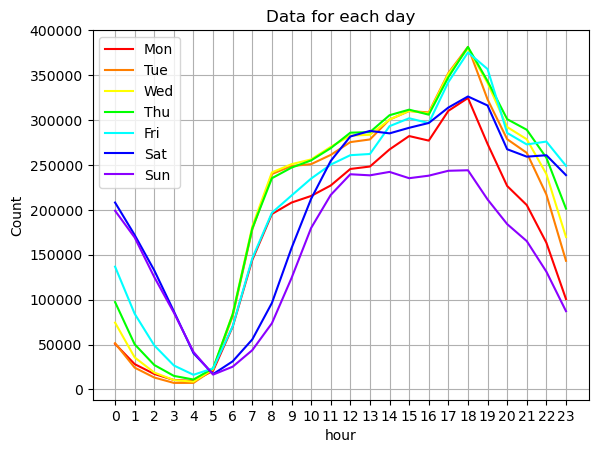

In [13]:
colors = ['#FF0000','#FF7F00','#FFFF00','#00FF00','#00FFFF','#0000FF','#8B00FF']
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
week_tripdatas = [
  mon_hour_tripdata,
  tue_hour_tripdata,
  wed_hour_tripdata,
  thu_hour_tripdata,
  fri_hour_tripdata,
  sat_hour_tripdata,
  sun_hour_tripdata
]
for i in range(len(week_tripdatas)):
  week_tripdata = week_tripdatas[i]
  plt.plot(range(0,24), week_tripdata['count'], color=colors[i], label=days[i])
plt.xlabel('hour')
plt.ylabel('Count')
plt.title('Data for each day')
plt.legend(loc='best')
custom_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
custom_labels = [month_count.index[tick] for tick in custom_ticks]
plt.xticks(custom_ticks, custom_labels)
plt.grid()